In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def lorenz_curve(true_labels, predicted_probs):
    """
    计算并绘制Lorenz曲线，返回曲线下的面积
    :param true_labels: 真实标签 (0或1)
    :param predicted_probs: 预测概率 (类别1的概率)
    :return: Lorenz曲线下的面积
    """
    # 按预测概率排序
    sorted_indices = np.argsort(predicted_probs)[::-1]
    sorted_true_labels = np.array(true_labels)[sorted_indices]
    
    # 计算累计和的比例
    cumulative_true_labels = np.cumsum(sorted_true_labels) / np.sum(sorted_true_labels)
    cumulative_total = np.arange(1, len(true_labels) + 1) / len(true_labels)
    
    # 添加一个起点（0,0）来正确计算面积
    cumulative_true_labels = np.insert(cumulative_true_labels, 0, 0)
    cumulative_total = np.insert(cumulative_total, 0, 0)
    
    # 计算Lorenz曲线下的面积
    lorenz_area = np.trapz(cumulative_true_labels, cumulative_total)
    
    # 绘制Lorenz曲线
    plt.figure(figsize=(8, 6))
    plt.plot(cumulative_total, cumulative_true_labels, label="Lorenz Curve")
    plt.plot([0, 1], [0, 1], label="Perfect Equality", linestyle="--", color="gray")
    plt.fill_between(cumulative_total, cumulative_true_labels, alpha=0.3)
    plt.title("Lorenz Curve")
    plt.xlabel("Cumulative share of population")
    plt.ylabel("Cumulative share of true labels")
    plt.legend()
    plt.show()
    
    return lorenz_area

def gini_from_lorenz(true_labels, predicted_probs):
    """
    根据Lorenz曲线计算Gini系数
    :param true_labels: 真实标签 (0或1)
    :param predicted_probs: 预测概率 (类别1的概率)
    :return: Gini系数
    """
    lorenz_area = lorenz_curve(true_labels, predicted_probs)
    # Gini系数 = 1 - 2 * 面积
    gini = 2 * lorenz_area - 1 
    return gini

from sklearn.metrics import roc_auc_score
def calculate_auc(true_labels, predicted_probs):
    """
    计算AUC (Area Under the ROC Curve)
    :param true_labels: 真实标签 (0 或 1)
    :param predicted_probs: 预测概率 (类别1的概率)
    :return: AUC值
    """
    # 计算 AUC
    auc = roc_auc_score(true_labels, predicted_probs)
    return auc

In [ ]:
true_labels = [1, 0, 1, 1, 0, 0, 1, 0, 1, 0]
predicted_probs = [0.9, 0.2, 0.8, 0.7, 0.1, 0.3, 0.95, 0.05, 0.85, 0.4]

In [ ]:
gini_value = gini_from_lorenz(true_labels, predicted_probs)
AUC = calculate_auc(true_labels, predicted_probs)

In [ ]:
print(f"Gini系数: {gini_value}")
print(f"AUC系数: {AUC}")

In [ ]:
a = 2 * AUC - 1
a

In [ ]:
import numpy as np

# 生成50组数据
np.random.seed(42)  # 设置随机种子，以确保结果可重现
true_labels = np.random.choice([0, 1], size=50)  # 随机生成0和1作为真实标签
predicted_probs = np.random.rand(50)  # 随机生成0到1之间的概率作为预测值

# 打印前10个数据点以查看生成的数据
print("真实标签:", true_labels)
print("预测概率:", predicted_probs)

In [ ]:
gini_value = gini_from_lorenz(true_labels, predicted_probs)
AUC = calculate_auc(true_labels, predicted_probs)

In [ ]:
print(f"Gini系数: {gini_value}")
print(f"AUC系数: {AUC}")

In [ ]:
a = 2 * AUC - 1
a

In [ ]:
import numpy as np

# 样本量
n = 50

# 真实标签，前25个为1，后25个为0
true_labels = np.array([1] * 25 + [0] * 25)

# 预测概率，前25个预测概率从0.75增加到1，后25个预测概率从0.25减少到0
predicted_probs = np.concatenate([np.linspace(0.75, 1, 25), np.linspace(0.25, 0, 25)])

# 打印前10个数据点以查看生成的数据
print("真实标签:", true_labels[:10])
print("预测概率:", predicted_probs[:10])

# 将其展示为表格
data = np.column_stack((range(1, n+1), true_labels, predicted_probs))
print("\n样本编号 | 真实标签 | 预测概率")
print(data)


In [ ]:
print(f"Gini系数: {gini_value}")
print(f"AUC系数: {AUC}")

In [ ]:
a = 2 * AUC - 1
a

In [ ]:
import numpy as np

# 设置样本量和正负样本的比例
n = 100  # 样本总数
positive_ratio = 1 / 100  # 正类样本占比
negative_ratio = 99 / 100  # 负类样本占比

# 生成真实标签：45个正类标签（1），5个负类标签（0）
true_labels = np.array([1] * int(n * positive_ratio) + [0] * int(n * negative_ratio))

# 生成预测概率：为正类样本生成较高的概率，为负类样本生成较低的概率
positive_probs = np.linspace(0.7, 1, int(n * positive_ratio))  # 正类概率从0.7到1
negative_probs = np.linspace(0.1, 0.3, int(n * negative_ratio))  # 负类概率从0.1到0.3

# 合并预测概率
predicted_probs = np.concatenate([positive_probs, negative_probs])

# 打乱数据（保证顺序随机）
indices = np.random.permutation(n)
true_labels = true_labels[indices]
predicted_probs = predicted_probs[indices]

# 打印前10个数据点以查看生成的数据
print("真实标签:", true_labels[:10])
print("预测概率:", predicted_probs[:10])

# # 将其展示为表格
# data = np.column_stack((range(1, n+1), true_labels, predicted_probs))
# print("\n样本编号 | 真实标签 | 预测概率")
# print(data)


In [ ]:
gini_value = gini_from_lorenz(true_labels, predicted_probs)
AUC = calculate_auc(true_labels, predicted_probs)

In [ ]:
print(f"Gini系数: {gini_value}")
print(f"AUC系数: {AUC}")


In [ ]:
a = 2 * AUC - 1
a

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def lorenz_curve_binned(true_labels, predicted_probs, n_bins=10):
    """
    Computes and plots the aggregated Lorenz curve and returns the area under the curve.

    Optimization approach:
    - Sorts the data in descending order of predicted probabilities.
    - Splits the sorted data into n_bins bins, aggregating samples within each bin.
    - Computes cumulative sample counts and cumulative positive sample counts (label=1) for each bin.
    - Uses these aggregated data points to construct the Lorenz curve and calculates its area using trapezoidal integration.

    :param true_labels: True labels (0 or 1)
    :param predicted_probs: Predicted probabilities (probability of class 1)
    :param n_bins: Number of bins (number of aggregated data points)
    :return: (lorenz_area, x_points, y_points)
             lorenz_area: Area under the Lorenz curve
             x_points: Cumulative sample proportion (x-axis points)
             y_points: Cumulative positive label proportion (y-axis points)
    """

    # Convert inputs to numpy arrays
    true_labels = np.array(true_labels)
    predicted_probs = np.array(predicted_probs)
    
    # Sort data in descending order of predicted probabilities
    sorted_indices = np.argsort(predicted_probs)[::-1]
    sorted_true = true_labels[sorted_indices]
    
    # Split the sorted labels into n_bins bins (bins may have different sizes)
    bins = np.array_split(sorted_true, n_bins)
    
    # Compute the number of samples and number of positive samples (label=1) in each bin
    bin_counts = np.array([len(b) for b in bins])
    bin_positive = np.array([np.sum(b) for b in bins])
    
    # Compute cumulative sample count and cumulative positive sample count
    cumulative_counts = np.cumsum(bin_counts)
    cumulative_positive = np.cumsum(bin_positive)
    
    total_samples = len(true_labels)
    total_positive = np.sum(true_labels)
    
    # Compute the aggregated Lorenz curve coordinates:
    # x-axis: Cumulative proportion of total samples
    # y-axis: Cumulative proportion of positive labels
    x_points = np.insert(cumulative_counts / total_samples, 0, 0)
    y_points = np.insert(cumulative_positive / total_positive, 0, 0)
    
    # Compute the area under the Lorenz curve using the trapezoidal rule
    lorenz_area = np.trapz(y_points, x_points)
    
    # Plot the aggregated Lorenz curve
    plt.figure(figsize=(8, 6))
    plt.plot(x_points, y_points, marker='o', label=f"Binned Lorenz Curve (n_bins={n_bins})")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Perfect Equality")
    plt.fill_between(x_points, y_points, alpha=0.3)
    plt.title("Binned Lorenz Curve")
    plt.xlabel("Cumulative share of population")
    plt.ylabel("Cumulative share of positive labels")
    plt.legend()
    plt.show()
    
    return lorenz_area, x_points, y_points

def gini_from_lorenz_binned(true_labels, predicted_probs, n_bins=10):
    """
    Computes the Gini coefficient based on the aggregated Lorenz curve.

    :param true_labels: True labels (0 or 1)
    :param predicted_probs: Predicted probabilities (probability of class 1)
    :param n_bins: Number of bins
    :return: Gini coefficient
    """
    lorenz_area, _, _ = lorenz_curve_binned(true_labels, predicted_probs, n_bins)
    # Gini coefficient = 2 * (Lorenz area) - 1
    gini = 2 * lorenz_area - 1
    return gini


In [3]:

from sklearn.metrics import roc_auc_score
def calculate_auc(true_labels, predicted_probs):
    """
    计算AUC (Area Under the ROC Curve)
    :param true_labels: 真实标签 (0 或 1)
    :param predicted_probs: 预测概率 (类别1的概率)
    :return: AUC值
    """
    # 计算 AUC
    auc = roc_auc_score(true_labels, predicted_probs)
    return auc

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [19]:
import numpy as np

# 设置样本量和正负样本的比例
n = 100  # 样本总数
positive_ratio = 1 / 100  # 正类样本占比
negative_ratio = 99 / 100  # 负类样本占比

# 生成真实标签：45个正类标签（1），5个负类标签（0）
true_labels = np.array([1] * int(n * positive_ratio) + [0] * int(n * negative_ratio))

# 生成预测概率：为正类样本生成较高的概率，为负类样本生成较低的概率
positive_probs = np.linspace(0.7, 1, int(n * positive_ratio))  # 正类概率从0.7到1
negative_probs = np.linspace(0.1, 0.3, int(n * negative_ratio))  # 负类概率从0.1到0.3

# 合并预测概率
predicted_probs = np.concatenate([positive_probs, negative_probs])

# 打乱数据（保证顺序随机）
indices = np.random.permutation(n)
true_labels = true_labels[indices]
predicted_probs = predicted_probs[indices]

# 打印前10个数据点以查看生成的数据
print("真实标签:", true_labels[:10])
print("预测概率:", predicted_probs[:10])

# # 将其展示为表格
# data = np.column_stack((range(1, n+1), true_labels, predicted_probs))
# print("\n样本编号 | 真实标签 | 预测概率")
# print(data)


真实标签: [0 0 0 0 0 0 0 0 0 0]
预测概率: [0.16734694 0.27346939 0.29183673 0.19591837 0.22244898 0.2122449
 0.29387755 0.10204082 0.12857143 0.23061224]


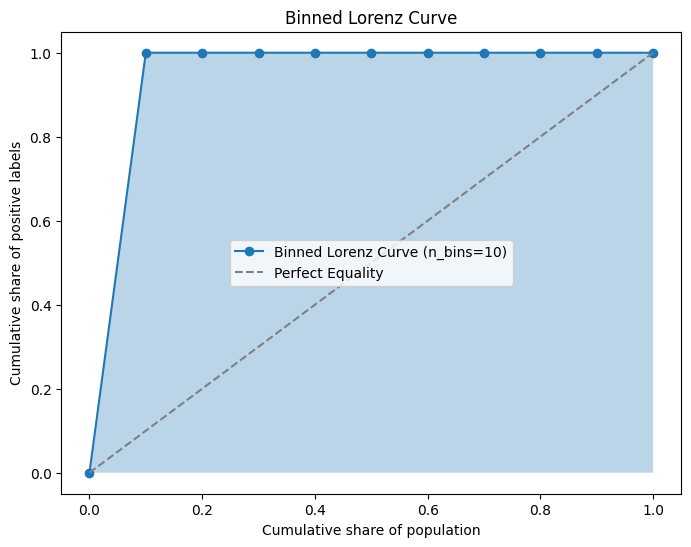

In [20]:
gini_value = gini_from_lorenz_binned(true_labels, predicted_probs)
AUC = calculate_auc(true_labels, predicted_probs)

In [21]:
print(f"Gini系数: {gini_value}")
print(f"AUC系数: {AUC}")

Gini系数: 0.8999999999999999
AUC系数: 1.0


In [22]:
a = 2 * AUC - 1
a

1.0

In [7]:
import numpy as np

# 生成50组数据
np.random.seed(42)  # 设置随机种子，以确保结果可重现
true_labels = np.random.choice([0, 1], size=500)  # 随机生成0和1作为真实标签
predicted_probs = np.random.rand(500)  # 随机生成0到1之间的概率作为预测值

# 打印前10个数据点以查看生成的数据
print("真实标签:", true_labels)
print("预测概率:", predicted_probs)

真实标签: [0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1
 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1
 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1
 0 1 1 0 1 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0
 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0
 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1
 0 0 1 0 0 0 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1
 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0 1
 0 1 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0 0
 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1
 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1
 1 0 0 1 0 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 1
 1 0 1 0 1 0 1 0 0 

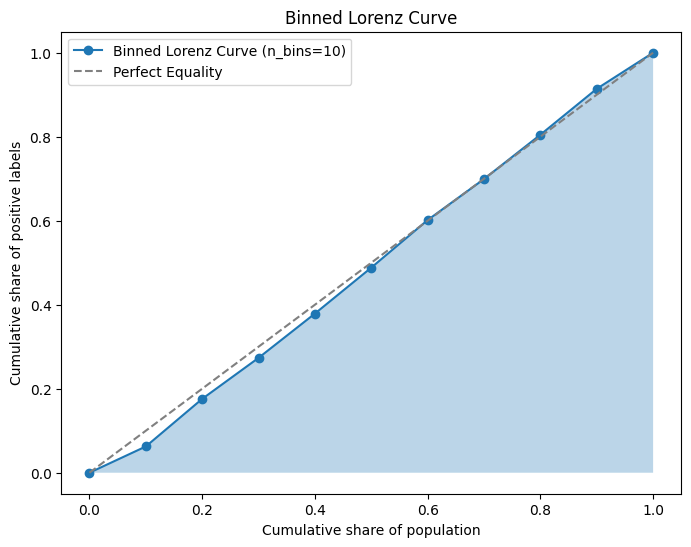

In [12]:
gini_value = gini_from_lorenz_binned(true_labels, predicted_probs,10)
AUC = calculate_auc(true_labels, predicted_probs)

In [13]:
print(f"Gini系数: {gini_value}")
print(f"AUC系数: {AUC}")

Gini系数: -0.020312499999999956
AUC系数: 0.4839427510245902
